This notebook shows an implementation of the epsilon "soft" support vector regression on a dataset of point that follows a linear function.

**Model:**

Now we add slack variables to the problem to account for cases in which the data in not in an epsilon border of the "true" function. The model is now:

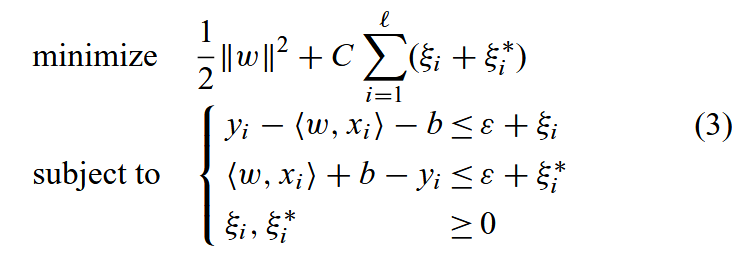

**Remarks:**
- For the "soft" epsilon border version we use the already existing implementation from `scikit-learn`.

In [2]:
%load_ext autoreload
%autoreload 2

# Local imports
from sv_machines.datasets.line import get_line_dataset, get_line_plot
from sklearn.svm import LinearSVR

# Load a line dataset

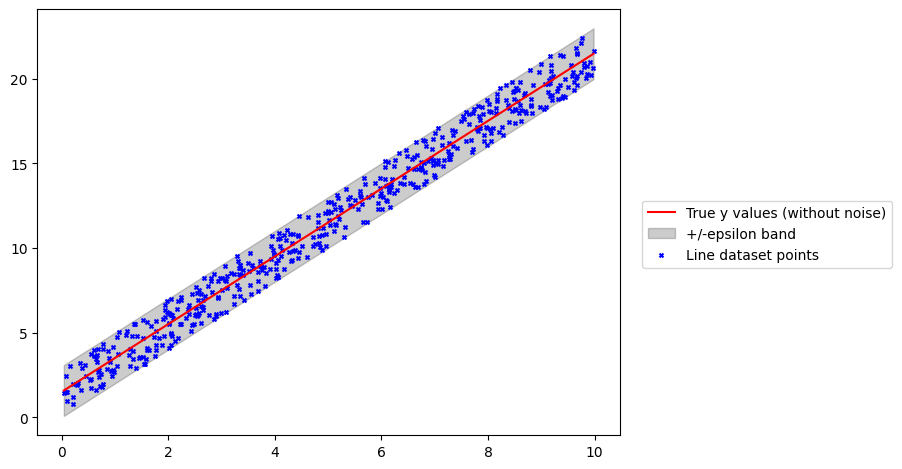

In [3]:
slope, offset, epsilon = 2.0, 1.5, 1.5

x_line, y_line = get_line_dataset(slope=slope, offset= offset, epsilon=epsilon, num_points=500, epsilon_strict=True)
fig, ax = get_line_plot(x_line, y_line, slope, offset, epsilon, with_true_function=True)
fig.tight_layout() 
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "soft" support vector regression on the dataset

We perform it with 3 different values of epsilon on the dataset above:
- $\varepsilon \times 1.01$ *(almost exactly the value of epsilon for the data)*
- $\varepsilon \times 2$ *(twice the value of epsilon for the data to show the result when the algorithm has more "freedom" than needed)*
- $\varepsilon \times 0.5$ $\rightarrow$ *the optimizer should return that the problem is infeasible.

-----------------------------
C=1, epsilon=1.6
-----------------------------

Regression function : y=[2.04228952]*x+[1.2200501] 

-----------------------------
C=1, epsilon=2
-----------------------------

Regression function : y=[2.02205957]*x+[0.89339113] 

-----------------------------
C=0.1, epsilon=2
-----------------------------

Regression function : y=[2.03854983]*x+[0.75369489] 

-----------------------------
C=0.001, epsilon=2
-----------------------------

Regression function : y=[1.79309375]*x+[0.30291206] 

-----------------------------
C=0.0001, epsilon=2
-----------------------------

Regression function : y=[0.25051233]*x+[0.0485] 

-----------------------------
C=1e-05, epsilon=2
-----------------------------

Regression function : y=[0.02505428]*x+[0.00486] 



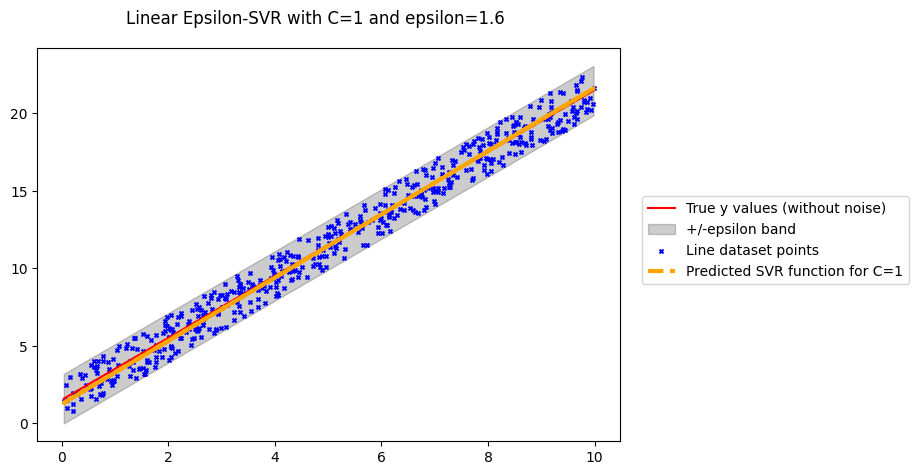

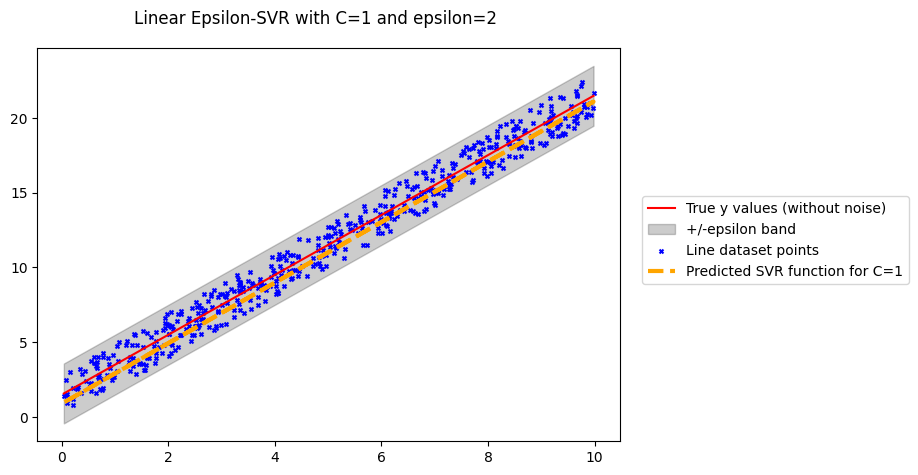

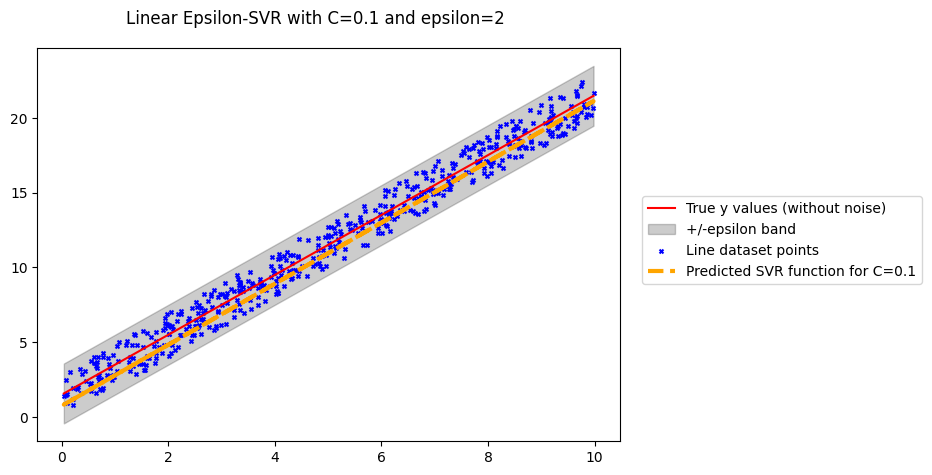

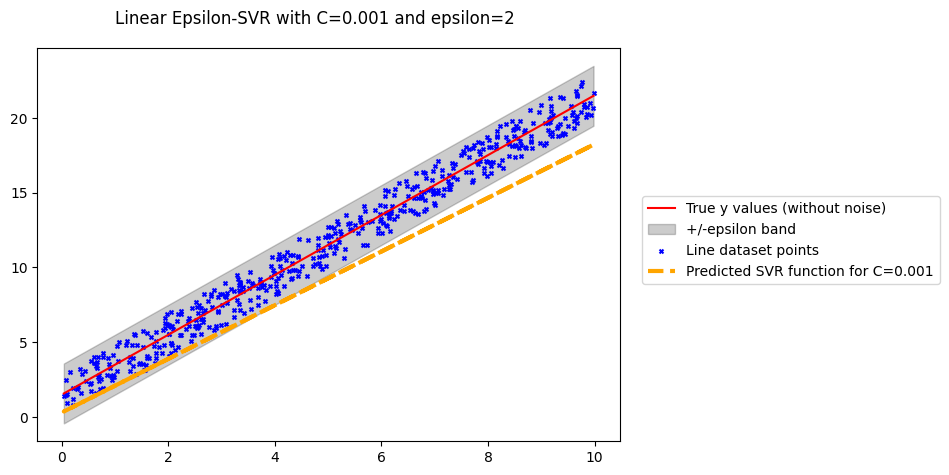

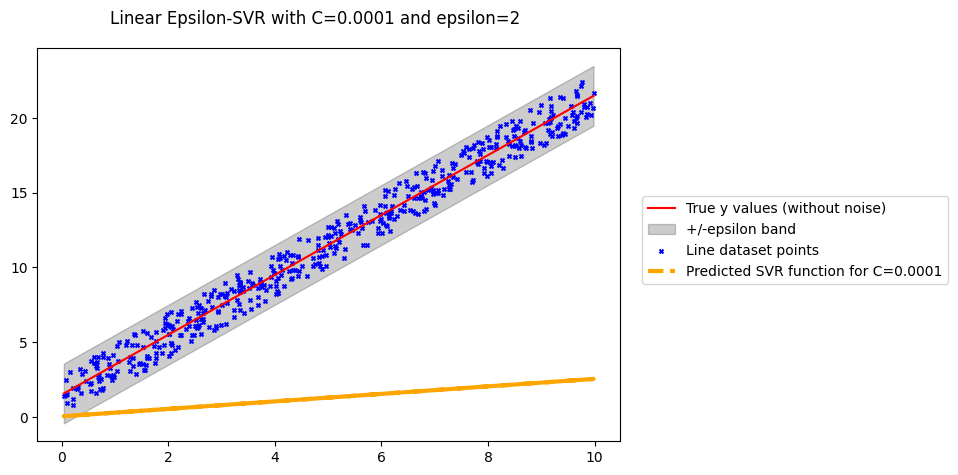

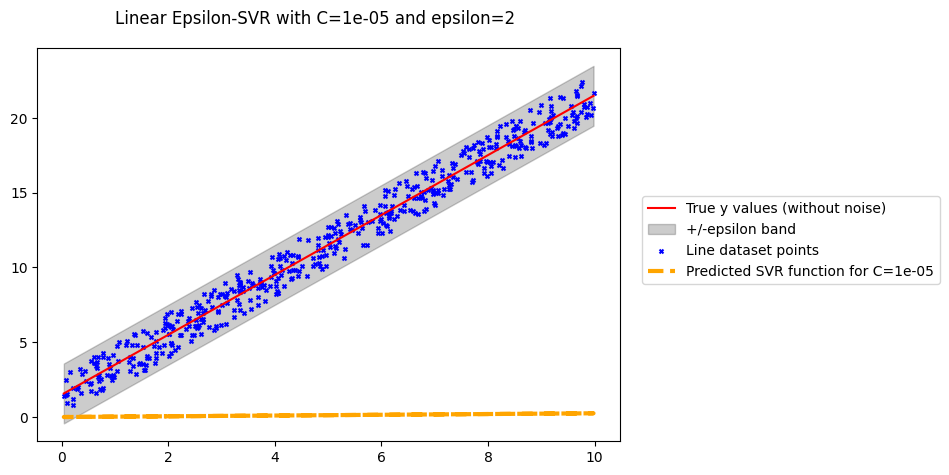

In [11]:
for C, epsilon in [(1, 1.6), (1, 2), (10**-1,2), (10**-3,2), (10**-4,2), (10**-5,2)]:
    print(f"-----------------------------\nC={C}, epsilon={epsilon}\n-----------------------------\n")
    model = LinearSVR(epsilon=epsilon, C=C, max_iter=10000)
    model.fit(x_line.reshape(-1,1), y_line)
    print(f"Regression function : y={model.coef_}*x+{model.intercept_} \n")
    fig, ax = get_line_plot(x_line, y_line, slope, offset, epsilon, with_true_function=True)
    ax.plot(x_line, model.predict(x_line.reshape(-1,1)), color='orange', linestyle='--', linewidth=3, label=f'Predicted SVR function for C={C}')
    fig.suptitle(f'Linear Epsilon-SVR with C={C} and epsilon={epsilon}')
    fig.tight_layout()
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


